In [1]:
from itertools import combinations
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from simul import (
    in_femto_sec, in_electron_volt, to_femto_sec, to_electron_volt,
    ispeak, HeWavePackets,
)

In [2]:
params = {
    'fwhm': 88,  # fwhm of a pulse in fs
    'k0': (24.475208+24.45167858)/2,  # eV
    # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
    'dt': 2*to_femto_sec(2*np.pi/in_electron_volt(24.475208-24.45167858)),
    'phi': 0,  # deg
}
t = np.linspace(
    in_femto_sec(-100),
    in_femto_sec(1000),
    1101,
)
k = np.linspace(
    in_electron_volt(24.3),
    in_electron_volt(24.6),
    1001,
)
pprint(params)

{'dt': 351.53161587216533, 'fwhm': 88, 'k0': 24.46344329, 'phi': 0}


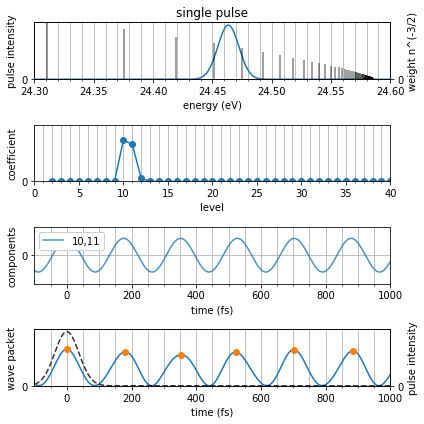

Local maximums at:
       0:     -0 fs
       1:    181 fs
       2:    354 fs
       3:    522 fs
       4:    702 fs
       5:    885 fs


In [6]:
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.figure(figsize=(6,6))
plt.subplot(411)
plt.title(f'single pulse')


def plotme1(t, k, wave):
    plt.xlabel('energy (eV)')
    plt.ylabel('pulse intensity')
    plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k))**2)
    plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
    plt.ylim(0, None)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig1-2
    plt.twinx()
    plt.ylabel('weight n^(-3/2)')
    plt.vlines(
        to_electron_volt(wave.target_klev),
        0,
        wave.target_nlev ** -1.5,
        alpha=0.5,
    )
    plt.ylim(0, 0.05)
    plt.yticks([0], [0])
plotme1(t, k, wave)


# fig2
plt.subplot(412)


def plotme2(t, k, wave):
    plt.xlabel("level")
    plt.ylabel("coefficient")
    plt.plot(wave.target_nlev, np.abs(wave.target_poplev()), '-o')
    plt.xlim(0, 40)
    plt.ylim(0, 5e-6)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
plotme2(t, k, wave)


# fig3
plt.subplot(413)


def plotme3(t, k, wave):
    wavesq = wave(t)
    n = wave.target_nlev
    plt.xlabel("time (fs)")
    plt.ylabel("components")
    for i, j in combinations(
                np.argwhere((10<=n) & (n<=11)).reshape(-1), 2
            ):
        plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{n[i]},{n[j]}')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(-2e-11, 2e-11)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
plotme3(t, k, wave)
plt.legend(loc='upper left', framealpha=1, ncol=1)


# fig4-1
plt.subplot(414)


def plotme4(t, k, wave):
    wavesq = wave(t)
    y = np.abs(wavesq.sum((1,2)))
    w = ispeak(y)
    plt.xlabel("time (fs)")
    plt.ylabel("wave packet")
    plt.plot(to_femto_sec(t), y)
    plt.plot(to_femto_sec(t[w]), y[w], 'o')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(0, 8e-11)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig4-2
    plt.twinx()
    plt.ylabel('pulse intensity')
    plt.plot(to_femto_sec(t), wave.pulsesabc(t)**2, 'k--', alpha=0.8)
    plt.ylim(0, None)
    plt.yticks([0], [0])
plotme4(t, k, wave)
plt.tight_layout()
plt.show()

wavesq = wave(t)
y = np.abs(wavesq.sum((1,2)))
w = ispeak(y)
print("""\
Local maximums at:
    {}""".format(
        "\n    ".join(f"{i:>4d}: {v:6.0f} fs" for i, v in enumerate(to_femto_sec(t[w]))),
    )
)

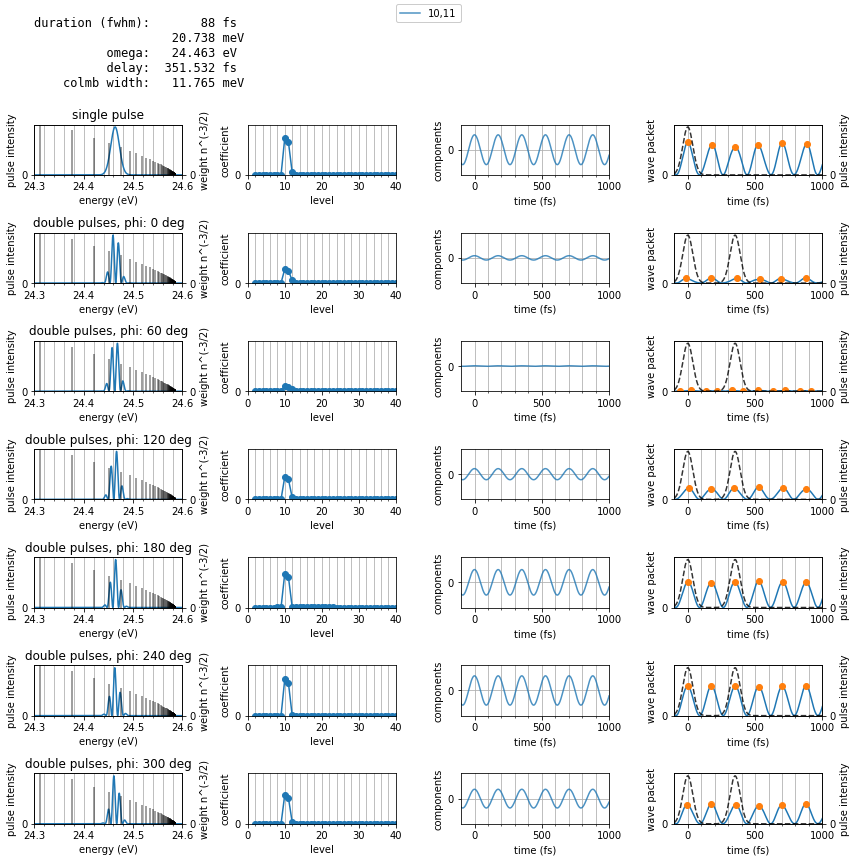

In [8]:
plt.figure(figsize=(12,12))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(8,4,1)
plt.text(
    0, 1,
    f"duration (fwhm): {to_femto_sec(wave.tdim_fwhm):>8.0f} fs\n"
    f"                 {to_electron_volt(wave.kdim_fwhm)*1000:>8.3f} meV\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.3f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt']))*1000:>8.3f} meV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(8,4,5)
plt.title('single pulse')
plotme1(t, k, wave)
plt.subplot(8,4,6)
plotme2(t, k, wave)
plt.subplot(8,4,7)
plotme3(t, k, wave)
plt.figlegend(loc='upper center', framealpha=1, ncol=1)
plt.subplot(8,4,8)
plotme4(t, k, wave)

for i, phi in enumerate(range(0, 360, 60)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )

    # fig1-1
    plt.subplot(8,4,4*i+9)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme1(t, k, wave)
    plt.subplot(8,4,4*i+10)
    plotme2(t, k, wave)
    plt.subplot(8,4,4*i+11)
    plotme3(t, k, wave)
    plt.subplot(8,4,4*i+12)
    plotme4(t, k, wave)
plt.tight_layout()
plt.show()

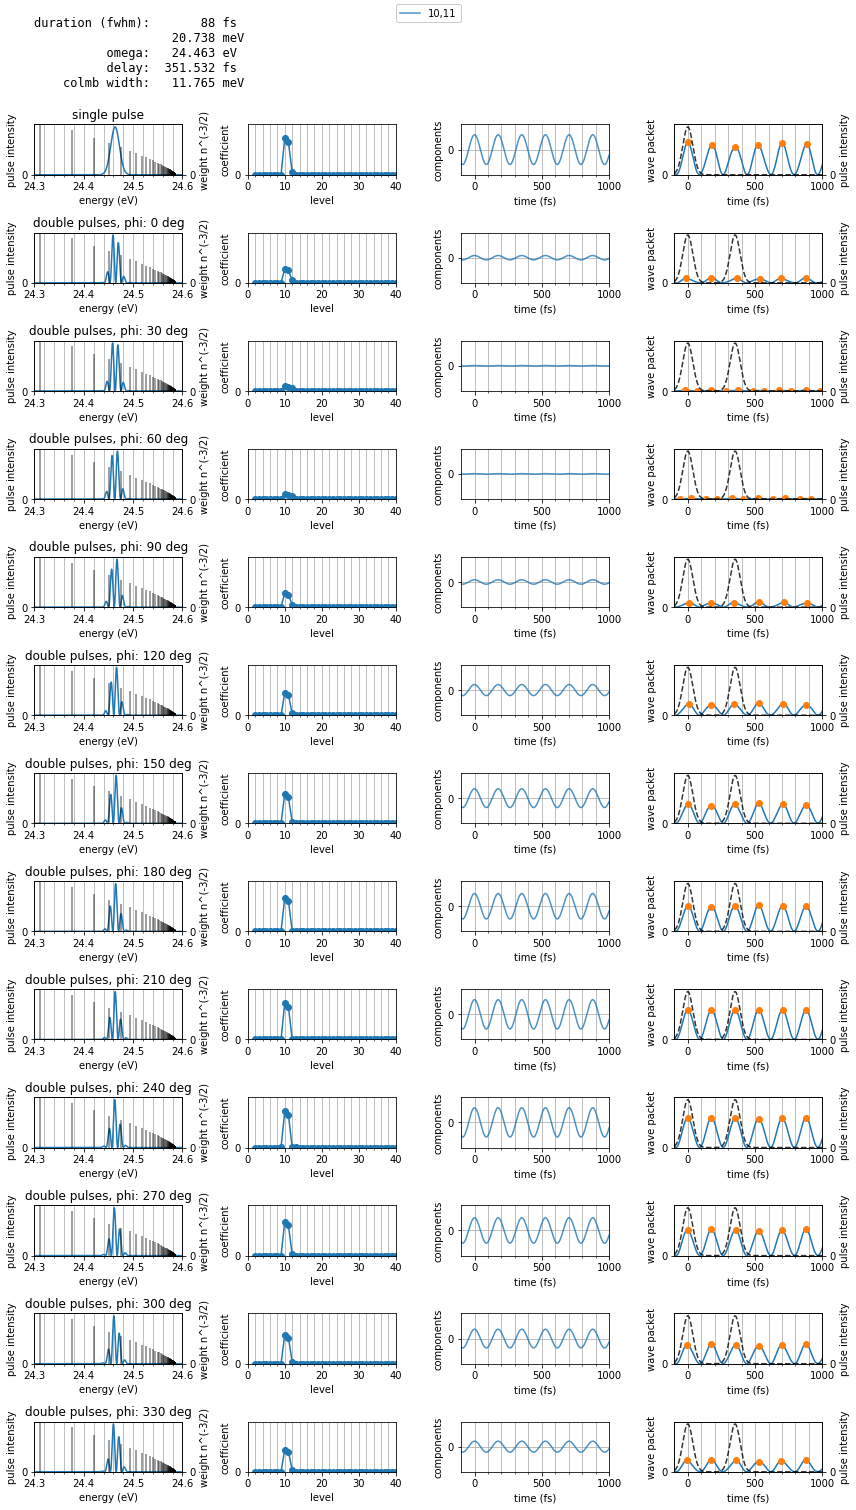

In [9]:
plt.figure(figsize=(12,21))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(14,4,1)
plt.text(
    0, 1,
    f"duration (fwhm): {to_femto_sec(wave.tdim_fwhm):>8.0f} fs\n"
    f"                 {to_electron_volt(wave.kdim_fwhm)*1000:>8.3f} meV\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.3f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt']))*1000:>8.3f} meV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(14,4,5)
plt.title('single pulse')
plotme1(t, k, wave)
plt.subplot(14,4,6)
plotme2(t, k, wave)
plt.subplot(14,4,7)
plotme3(t, k, wave)
plt.figlegend(loc='upper center', framealpha=1, ncol=1)
plt.subplot(14,4,8)
plotme4(t, k, wave)

for i, phi in enumerate(range(0, 360, 30)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )

    # fig1-1
    plt.subplot(14,4,4*i+9)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme1(t, k, wave)
    plt.subplot(14,4,4*i+10)
    plotme2(t, k, wave)
    plt.subplot(14,4,4*i+11)
    plotme3(t, k, wave)
    plt.subplot(14,4,4*i+12)
    plotme4(t, k, wave)
plt.tight_layout()
plt.show()